1. Data Loading and Cleaning

In [3]:
#Load the dataset using Pandas
import pandas as pd

# Load the dataset
df = pd.read_csv('Retail_sales.csv')

In [4]:
# Preview the dataset
df.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [5]:
# Checking for missing values 
df.isnull().sum()

Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Discount Percentage      0
Marketing Spend (USD)    0
Store Location           0
Product Category         0
Day of the Week          0
Holiday Effect           0
dtype: int64

In [6]:
# Checking for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [7]:
# Flag all duplicates
duplicates = df.duplicated().sum()

In [8]:
# Basic summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


In [9]:
# Checking numerical statistics
df.describe()

,Product ID,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD)
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.461294e+07,6.161967,2749.509593,2.973833,49.944033
std,2.779759e+07,3.323929,2568.639288,5.974530,64.401655
min,3.636541e+06,0.000000,0.000000,0.000000,0.000000
25%,2.228600e+07,4.000000,882.592500,0.000000,0.000000
50%,4.002449e+07,6.000000,1902.420000,0.000000,1.000000
75%,6.559352e+07,8.000000,3863.920000,0.000000,100.000000
max,9.628253e+07,56.000000,27165.880000,20.000000,199.000000


In [10]:
# Unique counts for categorical columns
categorical_columns = ['Store Location', 'Product Category', 'Day of the Week', 'Holiday Effect']
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in Store Location: 243
Unique values in Product Category: 4
Unique values in Day of the Week: 7
Unique values in Holiday Effect: 2


 2. Exploratory Data Analysis (EDA)

In [12]:
# Total sales revenue
total_revenue = df['Sales Revenue (USD)'].sum()
print(f"Total Sales Revenue: ${total_revenue:,.2f}")

Total Sales Revenue: $82,485,287.78


In [13]:
# Total units sold
total_units = df['Units Sold'].sum()
print(f"Total Units Sold: {total_units}")

Total Units Sold: 184859


In [14]:
# Average discount percentage
avg_discount = df['Discount Percentage'].mean()
print(f"Average Discount Percentage: {avg_discount:.2f}%")

Average Discount Percentage: 2.97%


In [15]:
# Total revenue by Product Category
revenue_by_category = df.groupby('Product Category')['Sales Revenue (USD)'].sum().sort_values(ascending=False)
print("Revenue by Product Category:\n", revenue_by_category)

Revenue by Product Category:
 Product Category
Electronics    29414540.61
Furniture      22913105.64
Clothing       19952024.73
Groceries      10205616.80
Name: Sales Revenue (USD), dtype: float64


In [16]:
# Average units sold by Store Location
avg_units_by_location = df.groupby('Store Location')['Units Sold'].mean().sort_values(ascending=False)
print("Average Units Sold by Store Location:\n", avg_units_by_location)

Average Units Sold by Store Location:
 Store Location
Jordan                         7.174603
Japan                          6.916667
Namibia                        6.891667
Timor-Leste                    6.780702
Oman                           6.763780
                                 ...   
Madagascar                     5.576923
Rwanda                         5.548673
Jamaica                        5.547297
Palau                          5.496296
French Southern Territories    5.495050
Name: Units Sold, Length: 243, dtype: float64


In [17]:
# Best-performing product based on total sales revenue
best_product = df.groupby('Product ID')['Sales Revenue (USD)'].sum().idxmax()
best_product_sales = df.groupby('Product ID')['Sales Revenue (USD)'].sum().max()
print(f"Best-Performing Product ID: {best_product} with sales of ${best_product_sales:,.2f}")


Best-Performing Product ID: 8628619 with sales of $4,824,635.43


3. Time Based Analysis

In [19]:
# Sales Revenue trends over time
df['Date'] = pd.to_datetime(df['Date'])  # Ensures the 'Date' column is in datetime format
sales_trends = df.groupby('Date')['Sales Revenue (USD)'].sum()
print("Sales Trends Over Time:")
print(sales_trends.head())  

Sales Trends Over Time:
Date
2022-01-01    120732.59
2022-01-02    113006.90
2022-01-03     85866.48
2022-01-04     88386.06
2022-01-05     84535.30
Name: Sales Revenue (USD), dtype: float64


In [20]:
# Total revenue by day of the week
revenue_by_day = df.groupby('Day of the Week')['Sales Revenue (USD)'].sum()
print("Revenue by Day of the Week:\n", revenue_by_day)

Revenue by Day of the Week:
 Day of the Week
Friday       11274065.43
Monday       11242331.20
Saturday     13128833.02
Sunday       13373193.70
Thursday     11294931.78
Tuesday      11117111.23
Wednesday    11054821.42
Name: Sales Revenue (USD), dtype: float64


4. Visualization

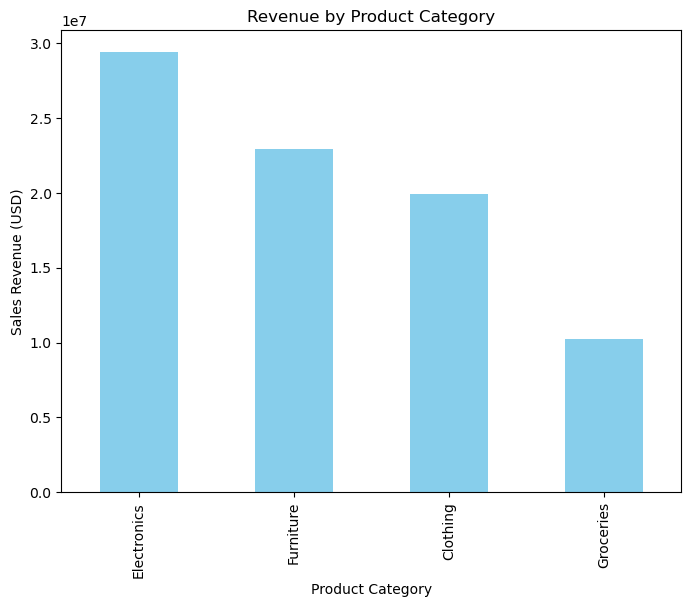

In [22]:
# 1. Revenue by Product Category
import matplotlib.pyplot as plt
import seaborn as sns

revenue_by_category.plot(kind='bar', color='skyblue', title='Revenue by Product Category', figsize=(8, 6))
plt.ylabel('Sales Revenue (USD)')
plt.show()

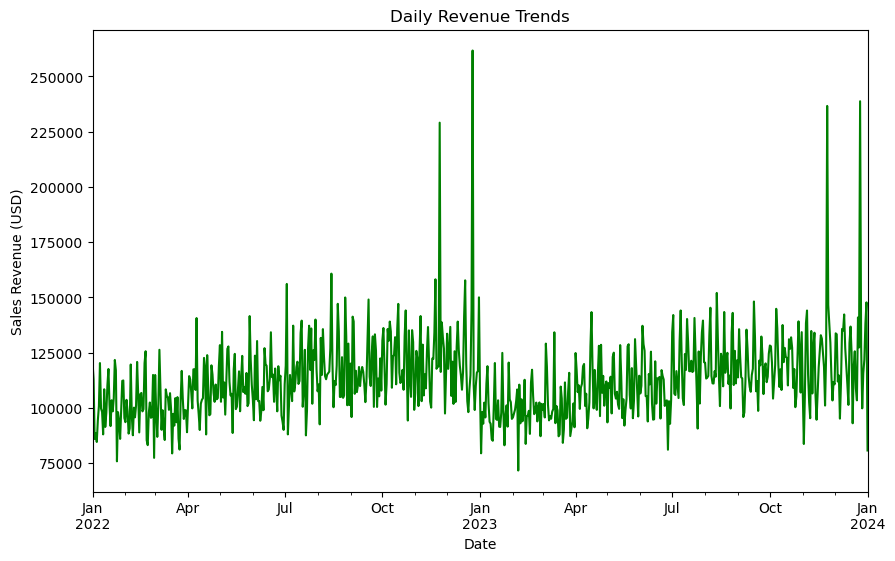

In [51]:
# Revenue Trends Over Time
# Calculate daily revenue
daily_revenue = df.groupby('Date')['Sales Revenue (USD)'].sum()

daily_revenue.plot(kind='line', title='Daily Revenue Trends', figsize=(10, 6), color='green')
plt.ylabel('Sales Revenue (USD)')
plt.xlabel('Date')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20548\3812243784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='viridis')


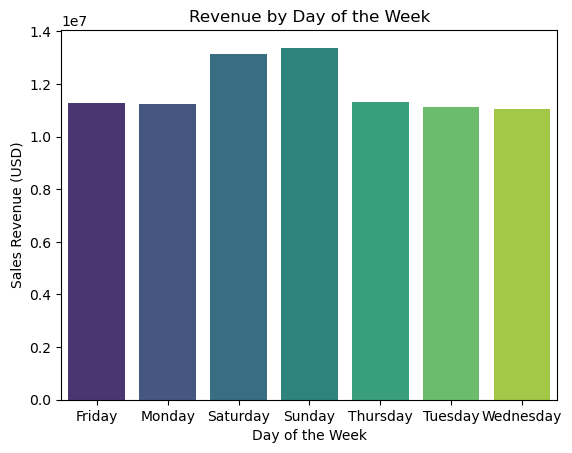

In [35]:
# Revenue by Day of the Week
sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='viridis')
plt.title('Revenue by Day of the Week')
plt.ylabel('Sales Revenue (USD)')
plt.xlabel('Day of the Week')
plt.show()

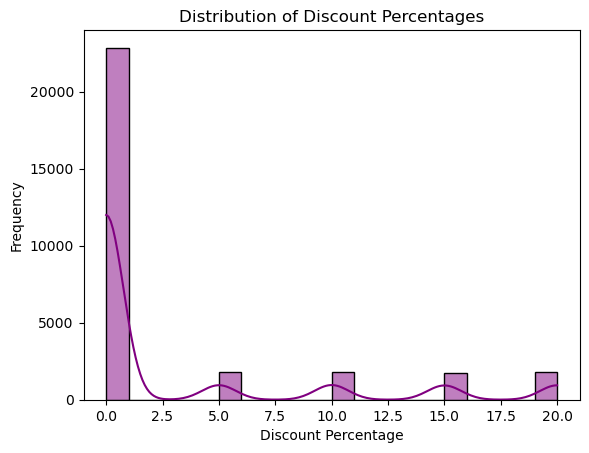

In [37]:
# Distribution of Discounts
sns.histplot(df['Discount Percentage'], kde=True, bins=20, color='purple')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

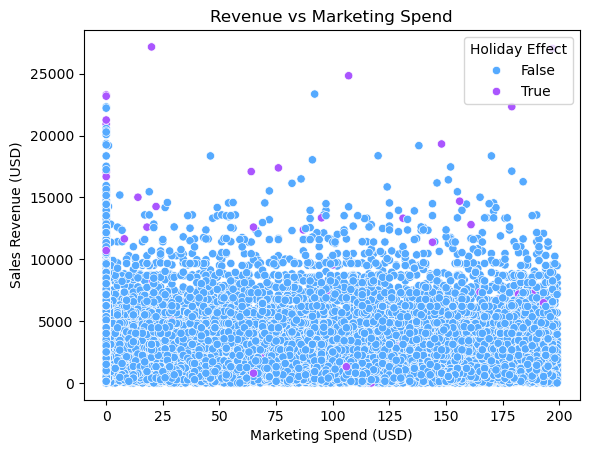

In [39]:
# Revenue vs Marketing Spend
sns.scatterplot(data=df, x='Marketing Spend (USD)', y='Sales Revenue (USD)', hue='Holiday Effect', palette='cool')
plt.title('Revenue vs Marketing Spend')
plt.xlabel('Marketing Spend (USD)')
plt.ylabel('Sales Revenue (USD)')
plt.show()

5. Advanced Analysis

In [41]:
#  Feature analysis Sales per Unit
df['Revenue per Unit'] = df['Sales Revenue (USD)'] / df['Units Sold']
print(df[['Product ID', 'Revenue per Unit']].head())

   Product ID  Revenue per Unit
0    52372247        304.632222
1    52372247        380.790000
2    52372247        380.790000
3    52372247        380.790000
4    52372247        380.790000


In [43]:
# Compare High Discount vs Low Discount Performance
# Categorize rows based on discount percentage
df['Discount Category'] = df['Discount Percentage'].apply(lambda x: 'High Discount' if x > 10 else 'Low Discount')

# Average revenue by discount category
avg_revenue_by_discount = df.groupby('Discount Category')['Sales Revenue (USD)'].mean()
print("Average Revenue by Discount Category:\n", avg_revenue_by_discount)

Average Revenue by Discount Category:
 Discount Category
High Discount    2351.832493
Low Discount     2802.815822
Name: Sales Revenue (USD), dtype: float64


In [45]:
# Compare Holiday vs Non-Holiday Revenue
holiday_revenue = df.groupby('Holiday Effect')['Sales Revenue (USD)'].sum()
print("Holiday vs Non-Holiday Revenue:\n", holiday_revenue)

Holiday vs Non-Holiday Revenue:
 Holiday Effect
False    81519132.39
True       966155.39
Name: Sales Revenue (USD), dtype: float64


In [47]:
# Identifying Top Performing Products
# Top 5 products by revenue
top_products = df.groupby('Product ID')['Sales Revenue (USD)'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Revenue:\n", top_products)

Top 5 Products by Revenue:
 Product ID
8628619     4824635.43
30776388    4819663.80
3636541     4249578.38
65656938    4101660.00
24102292    3878536.35
Name: Sales Revenue (USD), dtype: float64


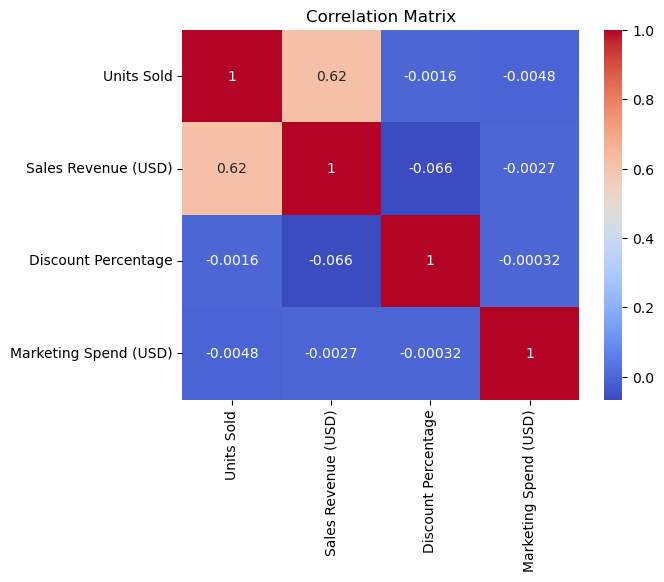

In [49]:
#  Correlation Analysis
# Correlation matrix
correlation_matrix = df[['Units Sold', 'Sales Revenue (USD)', 'Discount Percentage', 'Marketing Spend (USD)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

6. Report Finding
- It is evident that products with low discounts (≤ 10%) have a higher average sales revenue than those with high discounts. This suggests that discounts do not always correlate positively with sales performance. Therefore, it may be worth investigating if higher discounts are reducing profitability.

- The analysis reveals that non-holiday revenue is significantly higher than holiday revenue, highlighting that holidays might not be contributing as expected to sales. This could be an area to explore further, such as understanding the impact of specific holidays on product demand or marketing effectiveness.

- Units Sold vs Sales Revenue (USD): Strong positive correlation (0.62), confirming that as units sold increase, sales revenue follows accordingly.

-Discount Percentage vs Sales Revenue (USD): Moderate negative correlation (-0.066), suggesting that higher discounts tend to reduce revenue per unit.